# Problem statement

Determine association among employee experience, skills, traits etc.

In [214]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline

# Exploratory data analysis

In [175]:
employeeData = pd.read_csv("Employee_skills_traits.csv",skipinitialspace=True)
employeeData.head()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


In [176]:
employeeData.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [177]:
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
ID                                       998 non-null int64
Employment period                        998 non-null int64
Time in current department               998 non-null int64
Gender                                   998 non-null int64
Team leader                              998 non-null int64
Age                                      998 non-null int64
Member of professional organizations     998 non-null int64
.Net                                     998 non-null int64
SQL Server                               998 non-null int64
HTML CSS Java Script                     998 non-null int64
PHP mySQL                                998 non-null int64
Fast working                             998 non-null int64
Awards                                   998 non-null int64
Communicative                            998 non-null int64
dtypes: int64(14)
memory usage: 109.2 KB


#### Observations
1) There are 998 items in the dataset and 14 features.

2) There are no empty items

3) There are both categorical and numerical value in the given data set.

4) ID is a running queue to identify an employee uniquely.

5) Employment Period, Time in current department and Age are numerical values.

6) Gender, Team leader, Member of professional organizations, .Net, SQL Server, HTML CSS Java Script, PHP mySQL, Fast working, Awards and Communicative are all binary type of data having value either 0 or 1. 0 meaning absence of skill and 1 meaning presence.

7) Observed extra space in column name so removing it and convert the Categorical column in required datatype.

In [178]:
employeeData.rename(columns=lambda x: x.strip(), inplace=True)

In [179]:
employeeData.columns

Index(['ID', 'Employment period', 'Time in current department', 'Gender',
       'Team leader', 'Age', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative'],
      dtype='object')

In [180]:
convert_dict = {'Gender': str, 
                'Team leader':str,
                 'Member of professional organizations':str,
       '.Net':str, 'SQL Server':str, 'HTML CSS Java Script':str, 'PHP mySQL':str,
       'Fast working':str, 'Awards':str, 'Communicative':str
                     } 
  
employeeData = employeeData.astype(convert_dict) 
print(employeeData.dtypes) 

ID                                       int64
Employment period                        int64
Time in current department               int64
Gender                                  object
Team leader                             object
Age                                      int64
Member of professional organizations    object
.Net                                    object
SQL Server                              object
HTML CSS Java Script                    object
PHP mySQL                               object
Fast working                            object
Awards                                  object
Communicative                           object
dtype: object


In [181]:
employeeData['ID'].nunique()

974

Observations


1) ID column is having disitnct value for each record and some are duplicated so It will not much value to data incase of Assiciation Analysis. Hence Dropping the same

In [182]:
employeeData.drop("ID",axis=1,inplace=True)

In [183]:
employeeData.describe()

,Employment period,Time in current department,Age
count,998.000000,998.000000,998.000000
mean,10.388778,5.660321,40.441884
std,5.787715,3.196953,8.059964
min,1.000000,1.000000,24.000000
25%,5.000000,3.000000,34.000000
50%,10.000000,5.000000,40.000000
75%,15.000000,8.000000,47.000000
max,20.000000,12.000000,55.000000


In [184]:
employeeData.describe(include=['O'])

,Gender,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
count,998,998,998,998,998,998,998,998,998,998
unique,2,2,2,2,2,2,2,2,2,2
top,0,1,0,0,0,1,0,1,1,1
freq,514,503,509,522,523,507,521,502,501,520


#### Plotting Each feature

In [185]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

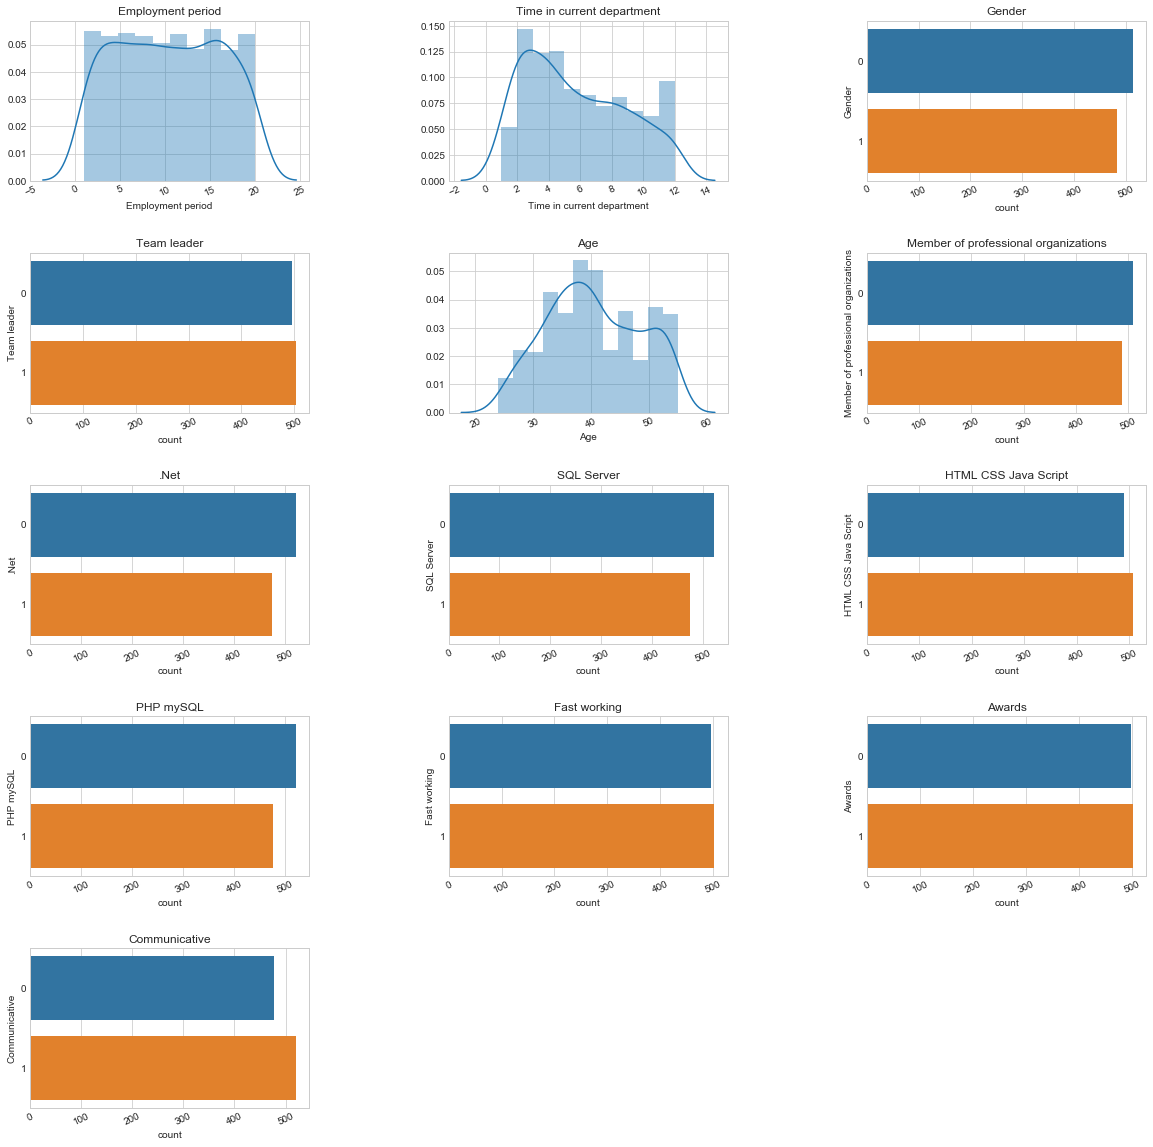

In [186]:
plot_distribution(employeeData, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [187]:
corr=employeeData.corr().abs()
corr

,Employment period,Time in current department,Age
Employment period,1.000000,0.495719,0.164389
Time in current department,0.495719,1.000000,0.076987
Age,0.164389,0.076987,1.000000


## Observations:

7) There doesn't seem to be noisy data in this data set as all binary type of columns have either 0 or 1 values. Also Age, Employment period and Time in current department seem to be well within the acceptable range.

8) All the numerical columns follow the same scale, i.e., number of years and hence no further scaling may be needed.


 

# Preprocess the data

In [188]:
employeeData['Employment period'].describe()

count    998.000000
mean      10.388778
std        5.787715
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Employment period, dtype: float64

Observation
- Range seems to 5 as STD is 5 and seems same distibution in box plot value of data

In [189]:
employment_period_bin_label = ['0-5', '6-10', '11-15', '16-20']
cut_bins = [0, 5, 10, 15, 20]
employeeData['employment_period_bin'] = pd.cut(employeeData['Employment period'], bins=cut_bins, labels=employment_period_bin_label)
employeeData.head()

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,employment_period_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20


In [190]:
employeeData['Age'].describe()

count    998.000000
mean      40.441884
std        8.059964
min       24.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       55.000000
Name: Age, dtype: float64

In [191]:
age_bin_label = ['20-30', '31-40', '41-50', '51-60']
cut_bins_age = [20, 30, 40, 50, 60]
employeeData['age_bin'] = pd.cut(employeeData['Age'], bins=cut_bins_age, labels=age_bin_label)
employeeData.head()

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,employment_period_bin,age_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5,41-50
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5,20-30
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15,31-40
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10,20-30
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20,31-40


In [192]:
employeeData['Time in current department'].describe()

count    998.000000
mean       5.660321
std        3.196953
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: Time in current department, dtype: float64

In [193]:
current_department_bin_label = ['0-3', '4-6', '7-9', '10-12']
cut_bins_curr_dept = [0, 3, 6, 9, 12]
employeeData['age_curr_dept_bin'] = pd.cut(employeeData['Time in current department'], bins=cut_bins_curr_dept, labels=current_department_bin_label)
employeeData.head()

,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,employment_period_bin,age_bin,age_curr_dept_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5,41-50,4-6
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5,20-30,0-3
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15,31-40,7-9
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10,20-30,4-6
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20,31-40,7-9


In [194]:
employeeData.drop(columns=['Age','Time in current department', 'Employment period'],axis=1,inplace=True)

In [195]:
employeeData.columns

Index(['Gender', 'Team leader', 'Member of professional organizations', '.Net',
       'SQL Server', 'HTML CSS Java Script', 'PHP mySQL', 'Fast working',
       'Awards', 'Communicative', 'employment_period_bin', 'age_bin',
       'age_curr_dept_bin'],
      dtype='object')

#### One hot encoding

In [196]:
encod_cols= ['employment_period_bin','age_bin','age_curr_dept_bin']
employeeData = pd.get_dummies(employeeData, columns=encod_cols,drop_first=True)

In [197]:
employeeData.head()

,Gender,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,employment_period_bin_6-10,employment_period_bin_11-15,employment_period_bin_16-20,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_curr_dept_bin_4-6,age_curr_dept_bin_7-9,age_curr_dept_bin_10-12
0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0
3,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,0


In [200]:
for i in employeeData.columns:
    print(i,":=",employeeData[i].unique())

Gender := [0 1]
Team leader := [1 0]
Member of professional organizations := [1 0]
.Net := [1 0]
SQL Server := [1 0]
HTML CSS Java Script := [0 1]
PHP mySQL := [1 0]
Fast working := [1 0]
Awards := [0 1]
Communicative := [1 0]
employment_period_bin_6-10 := [0 1]
employment_period_bin_11-15 := [0 1]
employment_period_bin_16-20 := [0 1]
age_bin_31-40 := [0 1]
age_bin_41-50 := [1 0]
age_bin_51-60 := [0 1]
age_curr_dept_bin_4-6 := [1 0]
age_curr_dept_bin_7-9 := [0 1]
age_curr_dept_bin_10-12 := [0 1]


In [199]:
convert_dict = {'Gender': int, 
                'Team leader':int,
                 'Member of professional organizations':int,
       '.Net':int, 'SQL Server':int, 'HTML CSS Java Script':int, 'PHP mySQL':int,
       'Fast working':int, 'Awards':int, 'Communicative':int
                     } 
  
employeeData = employeeData.astype(convert_dict) 
print(employeeData.dtypes) 

Gender                                  int32
Team leader                             int32
Member of professional organizations    int32
.Net                                    int32
SQL Server                              int32
HTML CSS Java Script                    int32
PHP mySQL                               int32
Fast working                            int32
Awards                                  int32
Communicative                           int32
employment_period_bin_6-10              uint8
employment_period_bin_11-15             uint8
employment_period_bin_16-20             uint8
age_bin_31-40                           uint8
age_bin_41-50                           uint8
age_bin_51-60                           uint8
age_curr_dept_bin_4-6                   uint8
age_curr_dept_bin_7-9                   uint8
age_curr_dept_bin_10-12                 uint8
dtype: object


# Proposing parameters such as support, confidence etc.  

In [205]:
frequent_itemsets=apriori(employeeData, min_support=0.5,use_colnames=True)

frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
4,0.521042,(Communicative)
1,0.508016,(HTML CSS Java Script)
0,0.504008,(Team leader)
2,0.503006,(Fast working)
3,0.502004,(Awards)


In [206]:
frequent_itemsets = apriori(employeeData, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets,length
9,0.521042,(Communicative),1
5,0.508016,(HTML CSS Java Script),1
1,0.504008,(Team leader),1
7,0.503006,(Fast working),1
8,0.502004,(Awards),1
2,0.489980,(Member of professional organizations),1
0,0.484970,(Gender),1
6,0.477956,(PHP mySQL),1
3,0.476954,(.Net),1
4,0.475952,(SQL Server),1


As we can see here, there are no two item frequent sets with min support of 40%, hence reducing it


In [211]:
frequent_itemsets = apriori(employeeData, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print("*"*15,"With 30% support","*"*15)
frequent_itemsets.sort_values(by='support',ascending=False)


*************** With 30% support ***************


,support,itemsets,length
9,0.521042,(Communicative),1
5,0.508016,(HTML CSS Java Script),1
1,0.504008,(Team leader),1
7,0.503006,(Fast working),1
8,0.502004,(Awards),1
2,0.489980,(Member of professional organizations),1
0,0.484970,(Gender),1
6,0.477956,(PHP mySQL),1
3,0.476954,(.Net),1
4,0.475952,(SQL Server),1


In [230]:
frequent_itemsets = apriori(employeeData, min_support=0.25, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print("*"*15,"With 25% support","*"*15)
frequent_itemsets.sort_values(by='support',ascending=False)


*************** With 25% support ***************


,support,itemsets,length
9,0.521042,(Communicative),1
5,0.508016,(HTML CSS Java Script),1
1,0.504008,(Team leader),1
7,0.503006,(Fast working),1
8,0.502004,(Awards),1
2,0.489980,(Member of professional organizations),1
0,0.484970,(Gender),1
6,0.477956,(PHP mySQL),1
3,0.476954,(.Net),1
4,0.475952,(SQL Server),1


As we can see here, there are few items with 2 items frequent set

In [215]:
rules_mlxtend = association_rules(frequent_itemsets,  metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Team leader),0.484970,0.504008,0.250501,0.516529,1.024843,0.006072,1.025898
1,(Team leader),(Gender),0.504008,0.484970,0.250501,0.497018,1.024843,0.006072,1.023953
2,(Fast working),(Team leader),0.503006,0.504008,0.257515,0.511952,1.015762,0.003996,1.016277
3,(Team leader),(Fast working),0.504008,0.503006,0.257515,0.510934,1.015762,0.003996,1.016211
4,(Communicative),(Team leader),0.521042,0.504008,0.289579,0.555769,1.102699,0.026970,1.116519


In [218]:
rules_mlxtend.shape

(16, 9)

In [221]:
important_business_rules = rules_mlxtend[ (rules_mlxtend['confidence'] >= 0.50) & (rules_mlxtend['lift'] >= 1) & (rules_mlxtend['support'] >= 0.25)]


In [225]:
print(important_business_rules.shape)
important_business_rules.sort_values(by=['lift','confidence','support'],ascending=[False,False,False])

(13, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Team leader),(Communicative),0.504008,0.521042,0.289579,0.574553,1.102699,0.026970,1.125775
4,(Communicative),(Team leader),0.521042,0.504008,0.289579,0.555769,1.102699,0.026970,1.116519
13,(Fast working),(PHP mySQL),0.503006,0.477956,0.251503,0.500000,1.046122,0.011088,1.044088
12,(PHP mySQL),(Fast working),0.477956,0.503006,0.251503,0.526205,1.046122,0.011088,1.048965
0,(Gender),(Team leader),0.484970,0.504008,0.250501,0.516529,1.024843,0.006072,1.025898
2,(Fast working),(Team leader),0.503006,0.504008,0.257515,0.511952,1.015762,0.003996,1.016277
3,(Team leader),(Fast working),0.504008,0.503006,0.257515,0.510934,1.015762,0.003996,1.016211
11,(HTML CSS Java Script),(Communicative),0.508016,0.521042,0.268537,0.528600,1.014505,0.003839,1.016032
10,(Communicative),(HTML CSS Java Script),0.521042,0.508016,0.268537,0.515385,1.014505,0.003839,1.015205
15,(PHP mySQL),(Communicative),0.477956,0.521042,0.251503,0.526205,1.009910,0.002468,1.010898


- Antecedent support- only LHS support
- consequents support--only RHS support
- Leverage- A->B support calculated standard deviation
- Conviction--- A->B Conviction show the dependies between LHS vs RHS, high value represent how much dependent consequent is dependent in antecedents

https://michael.hahsler.net/research/recommender/associationrules.html

leverage(X -> Y) = P(X and Y) - (P(X)P(Y))

Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem.

conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.